# Project Work, part 1.
- author: `gsxbl`

## General

- All project work in IND320 will result in personal hand-ins and online apps.
    1. A Jupyter Notebook run locally on your computer (later with access to online and local databases).
        - This will be your basic development and documentation platform.
            - Must include a brief description of AI usage.
            - Must include a 300-500-word log describing the compulsory work (including both Jupyter Notebook and Streamlit experience).
            - Must include links to your public GitHub repository and Streamlit app (see below) for the compulsory work.
        - Document headings should be clear and usable for navigation during development.
        - All code blocks must include enough comments to be understandable and reproducible if someone inherits your project.
        - All code blocks must be run before export to PDF so the messages and plots are shown.
    2. A Streamlit app running from https://[yourproject].streamlit.app/.
        - This will be an online version of the project, accessing data that has been exported to CSV format (later, also an online database).
        - The code, hosted at GitHub, must include relevant comments from the Jupyter Notebook and further comments regarding Streamlit usage.

    - There are four parts in the project work, building on each other and resulting in a final portfolio and app to be presented at the end of the semester.
    - Co-operation is applauded, and the use of AI tools is encouraged.

---

<span style='color: red; font-size:22px' > Notebook imports </span>

## 0. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---

# Tasks

## 1. GitHub and Streamlit.app accounts

1. Prepare a GitHub account and create a public repository for your project work. Addresses at streamlit.app must be unique, so include your GitHub user name or similar in the repository name. Report the Streamlit address and GitHub repository address in the Jupyter Notebook.
2. Log in to streamlit.app using your GitHub account.
3. Create a minimum working example of a Streamlit app, push it to GitHub, and ensure it works at https://[yourproject].streamlit.app/

<span style='color: red; font-size:22px' > Answers - GitHub and Streamlit.app accounts </span>

1. GitHub repository can be found [here](https://github.com/gsxbl/ind320)
2. Login confirmed
3. Streamlit app can be found [here](https://ind320-gsxbl.streamlit.app)

---

## 2. Jupyter Notebook
1. Read the supplied CSV file using Pandas.
2. Print its contents in a relevant way.
3. Plot each column separately.
4. Plot all columns together, splitting the Y-axis.
5. Remember to fill in the log and AI mentioned in the General section above.

<span style='color: red; font-size:22px' > Answers - Juptyer Notebook </span>

#### 2.1 Read the supplied data

In [2]:
df = pd.read_csv('../data/open-meteo-subset.csv',
                 index_col=0,
                 parse_dates=['time'])

#### 2.1 Print useful information

In [3]:
# print the head of the dataframe
df.head()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


In [4]:
# get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2020-01-01 00:00:00 to 2020-12-30 23:00:00
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature_2m (°C)     8760 non-null   float64
 1   precipitation (mm)      8760 non-null   float64
 2   wind_speed_10m (m/s)    8760 non-null   float64
 3   wind_gusts_10m (m/s)    8760 non-null   float64
 4   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 410.6 KB


In [5]:
# check distributions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),8760.0,-0.394909,6.711903,-19.3,-4.9,-1.0,4.1,19.9
precipitation (mm),8760.0,0.222854,0.493747,0.0,0.0,0.0,0.2,5.8
wind_speed_10m (m/s),8760.0,3.661689,2.253210,0.1,1.8,3.3,5.1,13.6
wind_gusts_10m (m/s),8760.0,8.300719,5.098909,0.2,4.5,7.7,11.5,28.7
wind_direction_10m (°),8760.0,212.209589,91.371980,0.0,128.0,238.0,292.0,360.0


#### 2.3 Plot each column separatly

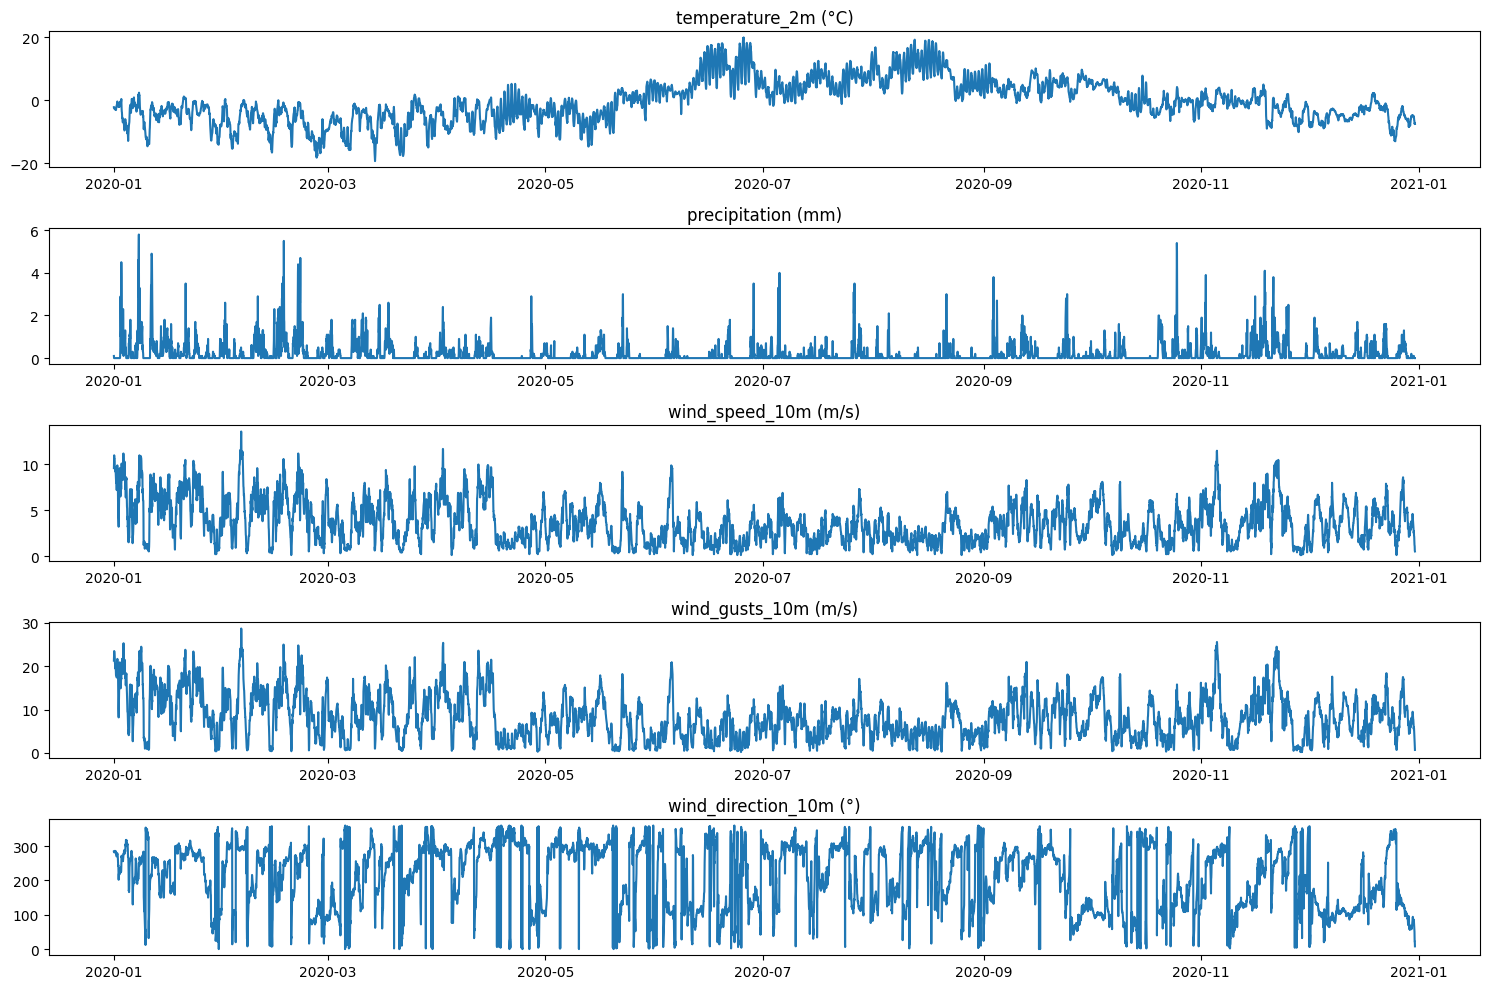

In [6]:
# generate a minimum contents plot of all columns
fig, axes = plt.subplots(5, figsize=(15, 10))

for col, ax in zip(df.columns, axes.ravel()):
    ax.plot(df.index, df[col])
    ax.set_title(col)

plt.tight_layout()

#### 2.4 Plot all together, splitting the y-axis
- Assuming all plots are to be made in one figure, I already did this in the previous task. However if is was meant as overlapping plots splitting the y-axis in 5 different parallells with different scale - that would just be to messy for any one to read. I tried.
- However, in the app I have run the plots through Plotly, which gives a bit more control over what is rendered in the plot. Please refer to the [streamlit app page3](https://ind320-gsxbl.streamlit.app/page_three) for details

---

## 3. Streamlit app
1. Create a Streamlit app including:
    - requirements.txt (for package dependencies)
    - Four pages (with dummy headers and test contents for now)
2. The front/home page should have a sidebar menu with navigation options to the other pages.
3. On the second page:
    - A table showing the imported data (see below). Use the row-wise LineChartColumn() to display the first month of the data series.
4. On the third page:
    - A plot of the imported data (see below), including header, axis titles and other relevant formatting.
    - A drop-down menu (st.selectbox) choosing any single column in the CSV or all columns together.
    - A selection slider (st.select_slider) to select a subset of the months. Defaults should be the first month.
    - Data should be read from a local CSV-file (open-meteo-subset.csv), using caching for app speed.

<span style='color: red; font-size:22px' > Answers - Streamlit app </span>

#### 3.1 Create a Streamlit app

In [7]:
# Print contents of streamlit app requirements
!cat ../requirements.txt

streamlit
pandas
plotly

In [8]:
# this is the applications folder structure
!cat ../README.md

# ind320 Streamlit app

- Version: 1.0
- Author: gsxbl

---

Deployed to Streamlit cloud [here.](https://ind320-gsxbl.streamlit.app)

---

## App structure
```
app/
├── .streamlit/
│   └── config.toml
│
├── data/
│   └── open-meto-subset.csv
│
├── modules/
│   ├── __init__.py
│   └── fetch.py
│
├── pages/
│   ├── 2_page_two.py
│   ├── 3_page_three.py
│   └── 4_page_four.py
│
├── notebooks/
│
├── .gitginore
├── main.py
├── requirements.txt
└── README.md
```

### Modules/
Contains per v1.0, some custom functions for streamlit-cached reading of csv-files

### Notebooks/
All notebooks used to document development will be published here.

### Pages/
Contains per v1.0, four different pages as per task description

### Data
This folder contains the supplied data for use in compulsory assignment 1, which corresponds to v1.0.

### Main.py
This file contains the main entry point for the application, and renders the front page.

#### 3.2 Sidebar
- as can be seen in the folder structure above, the streamlit app is a *mulitpage* configurement, i.e., all functionallity that is not seen on the entry point page is handled by the `.py` files within the `/pages` folder. Every file is listed at a menu sidebar on the frontend.

- page four contains dummy contents, but imo is the coolest one

#### 3.3 Page two
Page 2 is rendered as requested in the task description. Kindly refer to the code below:

In [9]:
!cat ../pages/2_page_two.py

import streamlit as st
from modules.fetch import csv_data, agg_first_month

class Page2:
    '''
    This class represents the app page.
    
    Most page contents is rendered in the run method.
    Properties are used to mimic global variables,
    making them accessible to all methods.
    '''
    def __init__(self):
        # general page setup
        st.set_page_config(layout='wide')
        st.header('Weather (dummy)Data ')

        # instantiate and cache data
        self._df = csv_data('data/open-meteo-subset.csv',
                            index_col=0, parse_dates=['time'])

    # --- PAGE CONTENTS ---
    def setup_contents(self):
        # aggreagte the first month
        df = agg_first_month(self._df)

        # # set configuration for linecharts within Dataframe
        for col in df.columns:
            col_cfg = st.column_config.LineChartColumn(col)
            
            # render to frontend
            st.dataframe(df[col], column_config={col:col_cfg})
        


#### 3.4 Page three
Page 2 is rendered as requested in the task description. Kindly refer to the code below:

In [10]:
!cat ../pages/3_page_three.py

import streamlit as st
import plotly.graph_objects as go

from modules.fetch import csv_data

class Page3:
    '''
    This class represents the app page.
    
    Most page contents is rendered in the run method.
    Properties are used to mimic global variables,
    making them accessible to all methods.
    '''
    def __init__(self):
        # general page setup
        st.set_page_config(layout='wide')
        st.header('Dummypage 3')

        # instantiate and cache data
        self._df = csv_data(
            'data/open-meteo-subset.csv', index_col=0,
            parse_dates=['time'])
        
        # extract months
        self._get_months()
    
    def _get_months(self):
        '''
        This method extracts and sorts the available
        months in the dataset and creates the property
        self._months. Method is run once in the constructor.
        '''
        months = self._df.index.to_period("M")
        self._months = months.sort_values().unique()
        
     

## Notes on development

1. I chose to setup my development environment slightly different than the task description:
    - Streamlit is run in a Docker Container instead of in the Jupyter Notebook.
    - I have access to the frontend interface via localhost at runtime without locking up the Notebook
    - My streamlit_app folder is of course synced with my GitHub repo.

2. Application has been develped iteratively, after creating a MVP (*minimum viable product*) to build on.
    - Small changes to th ecode has been saved and run immediately to ensure proper functionality.
    - Docker container i setup to read file from disk, essentially working in the same way as a Jupyter notebook.
    - Regular commit to `git`. Kindly refer to the `git log` export below.

3. Jupyter rarely been used during development, with a few exceptions:
    1. Creating this report
    2. Testing out manipulations of pandas dataframes

In [11]:
# My Dockerfile is set up like so:
!cat ../Dockerfile

# Use the official Python image
FROM python:3.11-slim

# Set up working directory witin the container
WORKDIR /app

# Copy the requirements file (path is relative)
COPY requirements.txt ./

# Install Python dependencies
RUN pip install --upgrade pip && pip install --no-cache-dir -r requirements.txt

# Expose port on host
EXPOSE 3200

# Define the command to run when the container starts
CMD ["python", "-m", "streamlit", "run", "main.py"]

In [12]:
# short summary of my git log
!git log --oneline

eb76715 (HEAD -> main, origin/main, origin/HEAD) added docstrings
b2bcfdb updated with folder structure and short description
fc41254 stacked column line charts horisontally
3a4035d removed requirements from ignore
f79ef2f these aren't the droids .gif
8c6c62a corrected task nums
5e8e002 added multiplot
a305d89 page3 MVP
dc3811e corrected class name
5a98a6e added task checkboxes
e6e8fa7 page two MVP
072c314 initial module
f816a5a added pycache
315068b initial page2 commit
bffbf59 added data for CA1
9a7d910 set wide layout
c1d8142 set new title and wide layout
64b1a4d added dev.ipynb
196e7ab changed task description
71d8b24 deleted
05fe12f setup dummypages
8910eb6 added balloons
31951c9 Formatted output as markdown
a88ad83 added runOnSave = true
aab2ae0 solved task 1
8f17145 clean-up of git stage mess
0484dad added Dockerstuff
96f6ae8 added secrets.toml
52e93b5 removed sidebar
6178868 initial commit
5b159e3 initial commit


---

### Declaration of AI usage
Generative AI has been used to some small extent during the development of this application.

LLM-models used are:
- `ChatGPT 5`
- `Google GEMINI`

Usage has been:
- Streamlit syntax lookup, and some initial help with the balloon logic in `main.py`
- `datetime` syntax and manipulation lookup
- Debugging: pasting entire error output. I recommend this method of debugging.

*GitHub CoPilot in VSC has been disabled during the entire development*

---

## Evaluation
- The uploaded PDF, GitHub repository, and Streamlit app will be assessed according to the recipe above.
    - By one fellow student in peer review.
    - By Liland or Kjæreng.
- TA/Teacher's feedback will be short and instructive regarding points of improvement and fulfillment of requirements.
- Final fulfilment of the course will be based on the four rounds of hand-ins seen as a whole.